In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer,Flatten,Input,Dense

In [2]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist

In [19]:
(images,target),(_,_) = fashion_mnist_data.load_data()

In [64]:
images = images[:10000]
target = target[:10000]

In [65]:
print(images.shape)

(10000, 28, 28)


In [66]:
target_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","shirt","Sneaker","Bag","Ankle boot"]

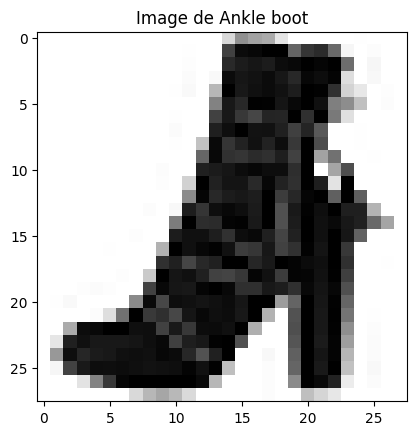

In [67]:

plt.imshow(images[11],cmap='binary')
plt.title(f"Image de {target_name[target[11]]}")
plt.show()

## Flatten the image

In [68]:
model = Sequential()
model.add(Input(shape=(28, 28)))
model.add(Flatten())

## Add layers

In [69]:
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [70]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [71]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer ='sgd',
    metrics= ['accuracy']
)

In [72]:
history = model.fit(images,target,epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1003 - loss: 1742088.2500
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0981 - loss: 2.3026
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1022 - loss: 2.3025
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0976 - loss: 2.3024
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1007 - loss: 2.3024
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1014 - loss: 2.3024
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1017 - loss: 2.3024
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1000 - loss: 2.3024
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1018 - loss: 2.3024
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0988 - loss: 2.3024


In [73]:
loss = history.history['loss']
acuracy = history.history['accuracy']

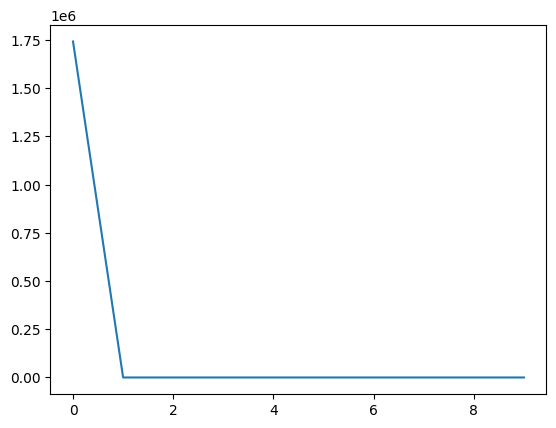

In [75]:
plt.plot(loss)
plt.show()

## Amelioration avec la normalisation


In [17]:
from sklearn.preprocessing import StandardScaler

In [20]:
images = images.reshape(-1,images[0].shape[0]*images[0].shape[1])

In [21]:
images = images[:10000]
target = target[:10000]


In [22]:
scale = StandardScaler()

In [23]:
image_scale = scale.fit_transform(images)

In [24]:
image_scale.max()

np.float64(93.30934487254103)

In [37]:
model = Sequential()
model.add(Input(shape=(28*28,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))



In [41]:
print(model.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer ='sgd',
    metrics= ['accuracy']
)


In [43]:
history = model.fit(image_scale,target,batch_size=32,epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7264 - loss: 0.8195
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8280 - loss: 0.4972
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8470 - loss: 0.4255
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8647 - loss: 0.3831
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8750 - loss: 0.3527
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8828 - loss: 0.3276
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8923 - loss: 0.3056
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9018 - loss: 0.2858
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9055 - loss: 0.2701
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9136 - loss: 0.2526


In [44]:
loss = history.history["loss"]
accuracy = history.history['accuracy']

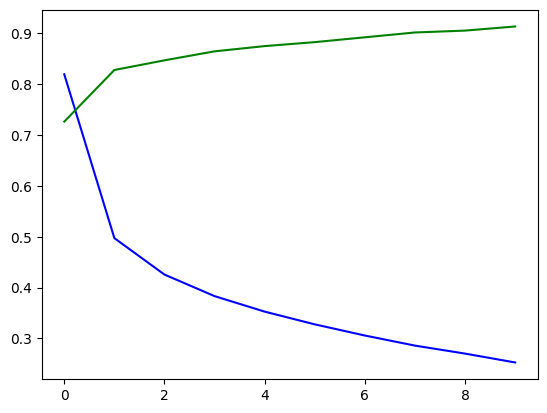

In [45]:
plt.plot(loss,color='blue')
plt.plot(accuracy,color='green')
plt.show()


In [46]:
images.shape

(10000, 784)

In [47]:
image_test = images[:5]
target_test = target[:5]

In [49]:
output = model.predict(image_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [50]:
output.shape

(5, 10)

In [51]:
filtered_test = output[np.arange(5),target_test]


In [52]:
filtered_test

array([1.0000000e+00, 9.9999499e-01, 0.0000000e+00, 2.2004931e-37,
       3.1413808e-12], dtype=float32)

In [53]:
from sklearn.model_selection import train_test_split

In [56]:
images.shape

(10000, 784)

In [57]:
X_train,X_test,Y_train,Y_test  = train_test_split(images,target,random_state=42,test_size=0.2)

In [60]:
Y_train = Y_train.reshape(-1,1)

In [63]:
X_train.shape ,X_test.shape


((8000, 784), (2000, 784))

In [81]:
model_1 = Sequential()
model_1.add(Input(shape=(784,)))
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(10 ,activation='softmax'))


In [82]:
model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer ='sgd',
    metrics= ['accuracy']
)

In [83]:
X_train.shape

(8000, 784)

In [84]:
Y_train.shape

(8000, 1)

In [85]:
history = model_1.fit(X_train,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1044 - loss: 934929443065954304.0000 - val_accuracy: 0.0925 - val_loss: 3.5213
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0992 - loss: 2.3024 - val_accuracy: 0.1119 - val_loss: 3.5214
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1027 - loss: 2.3022 - val_accuracy: 0.1119 - val_loss: 3.5216
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1019 - loss: 2.3021 - val_accuracy: 0.0894 - val_loss: 3.5218
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1070 - loss: 2.3020 - val_accuracy: 0.0894 - val_loss: 3.5219
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1058 - loss: 2.3019 - val_accuracy: 0.0894 - val_loss: 3.5220
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1070 - loss: 2.3019 - val_accuracy: 0.0894 - val_loss: 3.5222
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1070 - loss: 2.3019 

In [86]:
history.history

{'accuracy': [0.10437499731779099,
  0.09921874850988388,
  0.10265625268220901,
  0.10187499970197678,
  0.10703124850988388,
  0.10578124970197678,
  0.10703124850988388,
  0.10703124850988388,
  0.10703124850988388,
  0.10703124850988388],
 'loss': [9.349294430659543e+17,
  2.302370071411133,
  2.302186965942383,
  2.302064895629883,
  2.301974296569824,
  2.301924228668213,
  2.3018882274627686,
  2.3018639087677,
  2.301842212677002,
  2.3018252849578857],
 'val_accuracy': [0.0925000011920929,
  0.11187499761581421,
  0.11187499761581421,
  0.08937499672174454,
  0.08937499672174454,
  0.08937499672174454,
  0.08937499672174454,
  0.08937499672174454,
  0.08937499672174454,
  0.08937499672174454],
 'val_loss': [3.5212795734405518,
  3.521437644958496,
  3.5216078758239746,
  3.521768093109131,
  3.5219016075134277,
  3.522040367126465,
  3.5221610069274902,
  3.522263288497925,
  3.522345542907715,
  3.5224099159240723]}

In [87]:
loss_curve = history.history["loss"]
accuracy_curve = history.history["accuracy"]
validation_curve = history.history['val_accuracy']


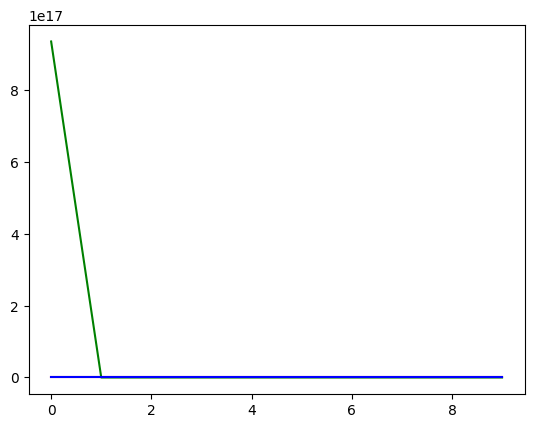

In [88]:
plt.plot(accuracy_curve ,color = 'red')
plt.plot(loss_curve,color = "green")
plt.plot(validation_curve,color= "blue")
plt.show()